# Задача 2: аппроксимация функции
Рассмотрим сложную математическую функцию на отрезке [1, 15]:

f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)

In [393]:
def f(x):
    return np.sin(x / 5.0) * np.exp(x / 10.0) + 5 * np.exp(-x / 2.0)

In [394]:
f(1.0), f(15.0)

(3.252216865271419, 0.6352214195786656)

### Сформируйте систему линейных уравнений (то есть задайте матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15.

In [396]:
M1 = np.array([[1., 1.], [1., 15.]])
v1 = np.array([f(1.0), f(15.0)]) 
w2 = np.linalg.solve(M1, v1)
w2

array([ 3.43914511, -0.18692825])

In [401]:
def m1(x):
    return w2[0] + w2[1] * x

In [402]:
import matplotlib.pyplot as plt

In [403]:
x = np.arange(1.0,15.0,0.1)
y0 = list(map(f, x))
y1 = list(map(m1, x))

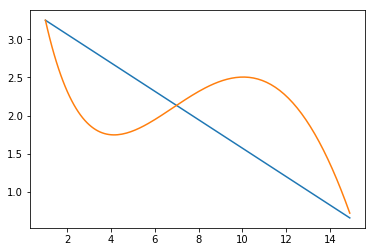

In [404]:
plt.plot(x, y1)
plt.plot(x, y0)
plt.show()

### Повторите те же шаги для многочлена второй степени, который совпадает с функцией f в точках 1, 8 и 15.

In [405]:
M2 = np.array([[1., 1., 1.0], [64., 8., 1.], [225., 15., 1.]])
v2 = np.array([f(1.0),f(8.0), f(15.0)]) 
w3 = np.linalg.solve(M2, v2)
w3

array([-0.00760104, -0.06531159,  3.32512949])

In [406]:
def m2(x):
    return w3[0]*(x**2) + w3[1]*x + w3[2]

In [407]:
y2 = list(map(m2, x))

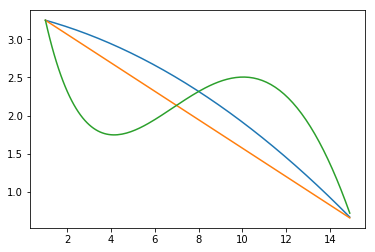

In [408]:
plt.plot(x, y2)
plt.plot(x, y1)
plt.plot(x, y0)
plt.show()

### Повторите те же шаги для многочлена третьей степени, который совпадает с функцией f в точках 1, 4, 10 и 15.

In [409]:
M3 = np.array([[1., 1., 1., 1.], [1., 4., 4.**2, 4.**3], [1., 10., 100., 1000.], [1., 15., 15.**2, 15.**3]])
v3 = np.array([f(1), f(4), f(10), f(15)]) 
w4 = np.linalg.solve(M3, v3)
w4

array([ 4.36264154, -1.29552587,  0.19333685, -0.00823565])

In [413]:
def m3(x):
    return w4[0] + w4[1]*x + w4[2]*(x**2) + w4[3]*(x**3) 

In [414]:
y3 = list(map(m3, x))

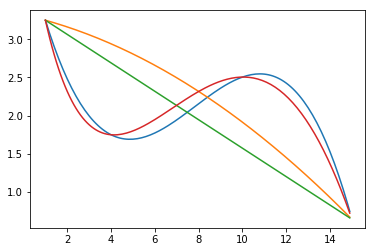

In [415]:
plt.plot(x, y3)
plt.plot(x, y2)
plt.plot(x, y1)
plt.plot(x, y0)
plt.show()

In [416]:
answer = ' '.join([str(round(i,2)) for i in w4])
answer

'4.36 -1.3 0.19 -0.01'

In [417]:
with open('submission-2.txt', 'w') as f:
    f.write(answer)